In [1]:
import pandas as pd
import numpy as np
def topsis(data,weights,impacts,output_file):
  df = data
  df = df.drop(data.columns[0], axis=1)
  mat = np.array(df)
  w = np.array(weights)
  i = np.array(impacts)
  normalized_mat = mat/np.linalg.norm(mat, axis=0)
  weighted_normalized_mat = normalized_mat*w
  if '-' in impacts:
    ideal_best = np.min(weighted_normalized_mat,axis=0)
    ideal_worst = np.max(weighted_normalized_mat,axis=0)
  else:
    ideal_best = np.max(weighted_normalized_mat,axis=0)
    ideal_worst = np.min(weighted_normalized_mat,axis=0)
  eucledian_dist_best = np.linalg.norm(weighted_normalized_mat-ideal_best,axis=1)
  eucledian_dist_worst = np.linalg.norm(weighted_normalized_mat-ideal_worst,axis=1)
  performance_score = eucledian_dist_worst/(eucledian_dist_best + eucledian_dist_worst)
  
  data['Topsis_Score'] = pd.DataFrame(performance_score, columns = ['Topsis_Score'])
  data['Rank'] = data['Topsis_Score'].rank(ascending=False, method='min').astype(int)
  
  return data.to_csv(output_file, index=False)

In [4]:
data = pd.read_csv('Topsis_input.csv')
impacts = ['+','+','+','-']
weights = [1,2,2,1]
topsis(data,weights,impacts,'Topsis_output.csv')

In [6]:
output_df = pd.read_csv('Topsis_output.csv')
output_df

,Unnamed: 0,ROUGE-N,ROUGE-L,F1,Response Length,Topsis_Score,Rank
0,microsoft/DialoGPT-small,0.135294,0.090196,0.136364,6.8,0.909010,1
1,microsoft/DialoGPT-medium,0.197403,0.150649,0.161212,16.6,0.263484,3
2,gorkemgoknar/gpt2chatbotenglish,0.169444,0.136111,0.148000,24.0,0.182687,4
3,Vaibhav-rm/GPT2-Shri-v1,0.157143,0.104762,0.157143,4.4,0.796797,2


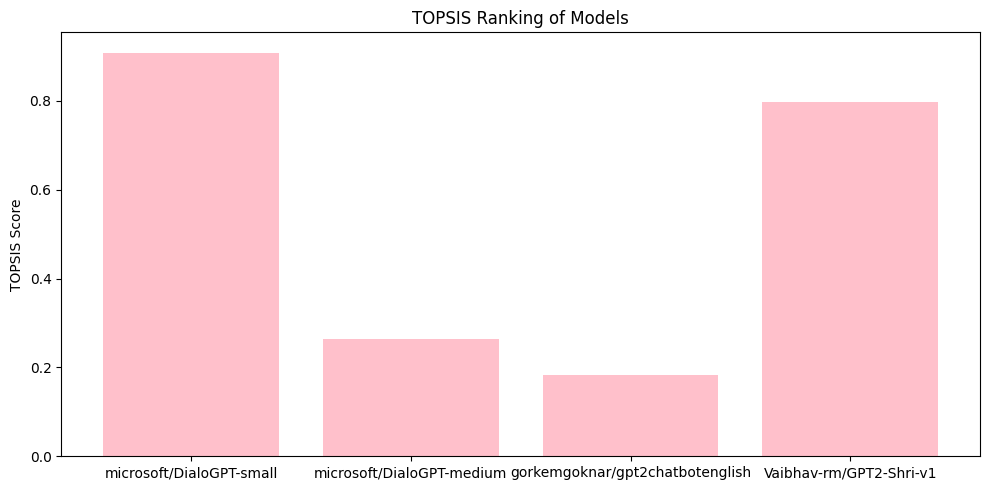

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(output_df['Unnamed: 0'],output_df['Topsis_Score'], color='pink')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Ranking of Models')
plt.tight_layout()
plt.savefig('Topsis_BarGraph.png')
plt.show()

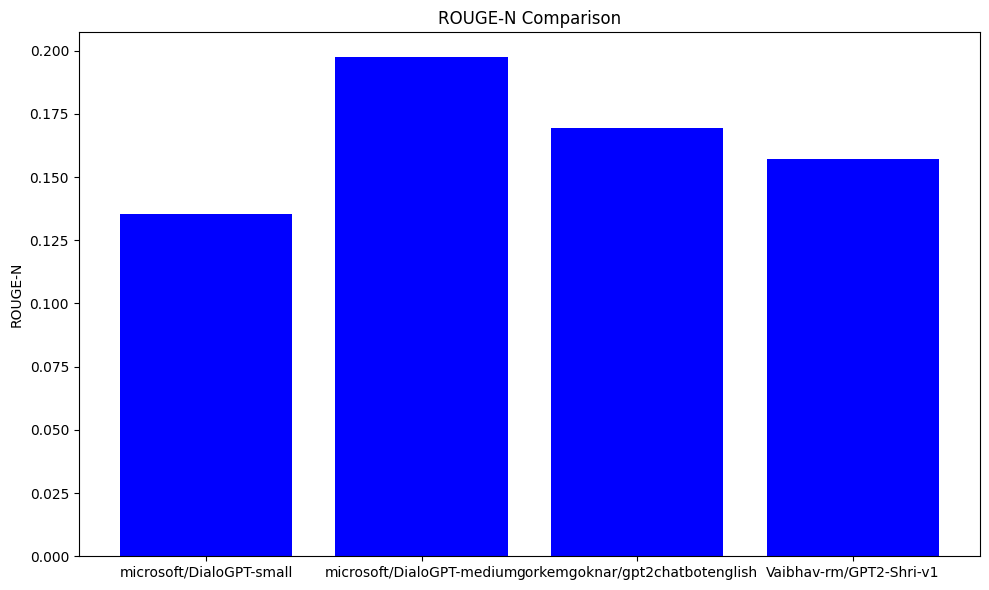

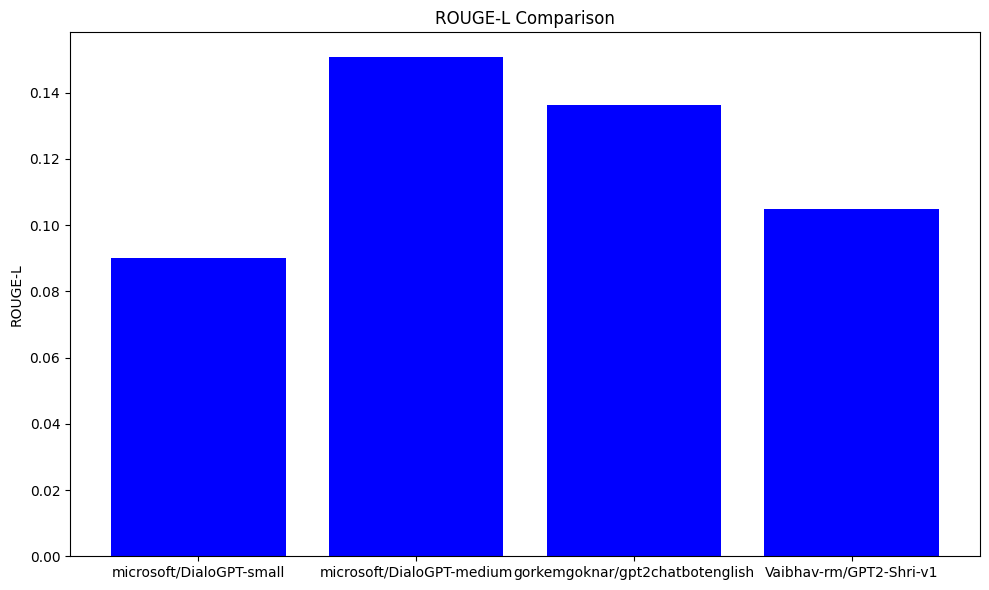

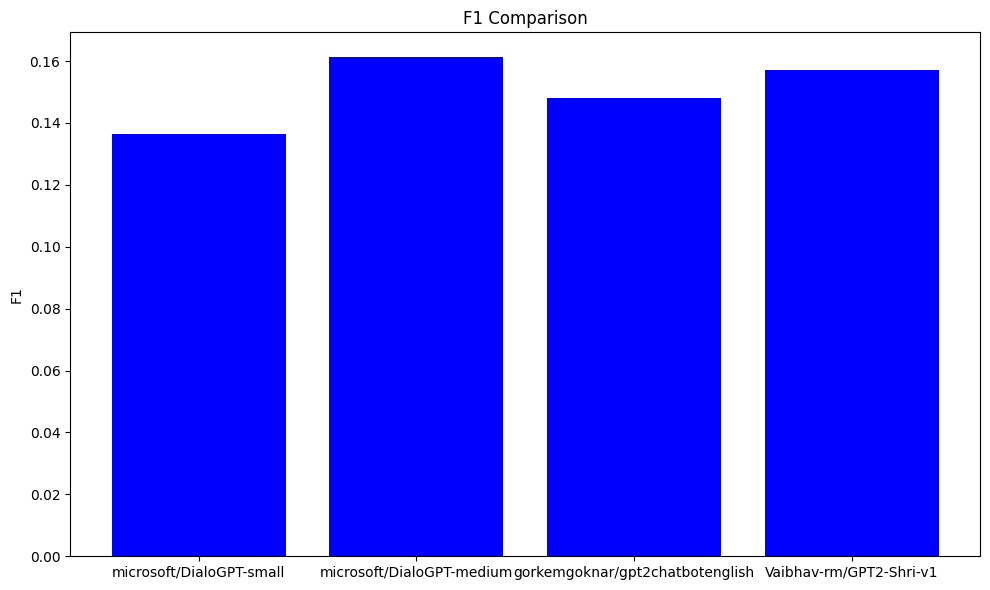

In [15]:
metrics = ['ROUGE-N', 'ROUGE-L', 'F1']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(output_df['Unnamed: 0'], output_df[metric], color='blue')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.tight_layout()
    plt.savefig(f'{metric}_Comparison.png')
    plt.show()


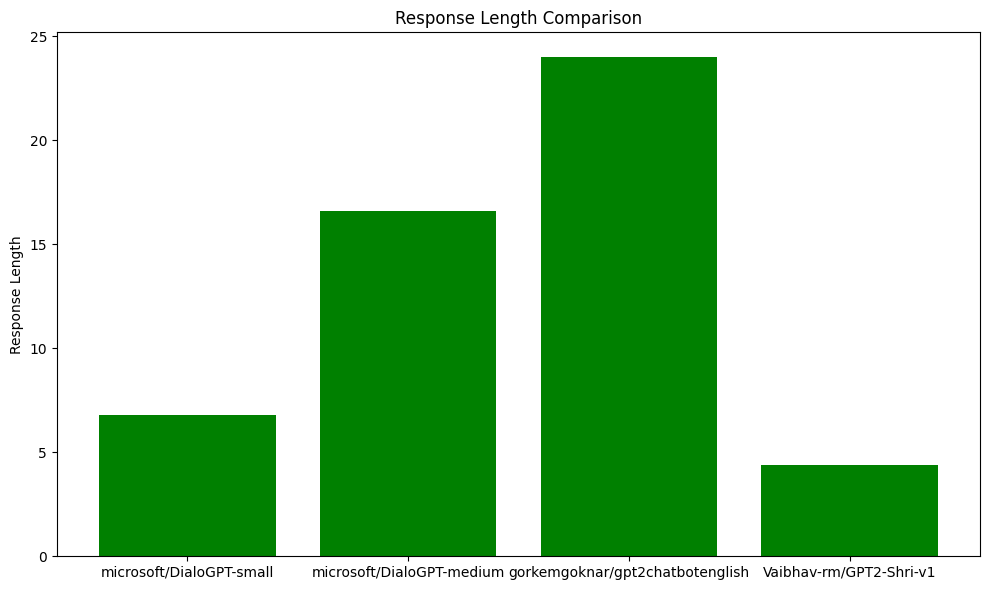

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(output_df['Unnamed: 0'],output_df['Response Length'], color='green')
plt.ylabel('Response Length')
plt.title('Response Length Comparison')
plt.tight_layout()
plt.savefig('Response_length_Comparison.png')
plt.show()
